In [1]:
import tensorflow as tf
tf.__version__

'2.0.0-beta0'

In [3]:
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(train_image, train_label), (test_image, test_label) = fashion_mnist.load_data()

In [6]:
train_image = train_image / 255.0

test_image = test_image / 255.0

In [29]:
input = keras.Input(shape=(28, 28))

In [30]:
x = keras.layers.Flatten()(input)

In [31]:
x = keras.layers.Dense(128, activation='relu')(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(128, activation='relu')(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(128, activation='relu')(x)
x = keras.layers.Dropout(0.5)(x)

In [32]:
output = keras.layers.Dense(10, activation='softmax')(x)

In [33]:
model = keras.Model(inputs=input, outputs=output)

In [34]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               1651

In [35]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [36]:
history = model.fit(train_image, train_label, 
                    epochs=10, validation_data=(test_image, test_label))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 100us/sample - loss: 0.8679 - accuracy: 0.6830 - val_loss: 0.5447 - val_accuracy: 0.8083
Epoch 2/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.6217 - accuracy: 0.7748 - val_loss: 0.4985 - val_accuracy: 0.8249
Epoch 3/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.5775 - accuracy: 0.7945 - val_loss: 0.4629 - val_accuracy: 0.8227
Epoch 4/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.5471 - accuracy: 0.8067 - val_loss: 0.4505 - val_accuracy: 0.8368
Epoch 5/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.5305 - accuracy: 0.8150 - val_loss: 0.4391 - val_accuracy: 0.8405
Epoch 6/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.5114 - accuracy: 0.8209 - val_loss: 0.4364 - val_accuracy: 0.8435
Epoch 7/10
60000/60000 [==============================]

In [37]:
test_loss, test_acc = model.evaluate(test_image, test_label)

10000/10000 [==============================] - 0s 31us/sample - loss: 0.4226 - accuracy: 0.8450


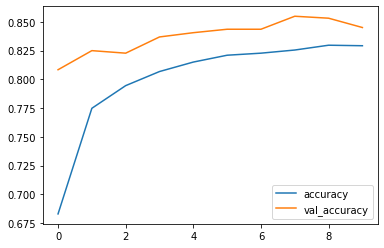

In [38]:
plt.plot(history.epoch, history.history.get('accuracy'), label='accuracy')
plt.plot(history.epoch, history.history.get('val_accuracy'), label='val_accuracy')
plt.legend()

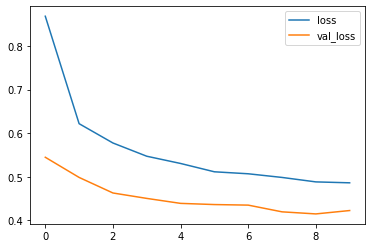

In [39]:
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')
plt.legend()